# METEOROLOGICAL DATA ANALYSIS OF WEATHER DATA FROM 2006 - 2016

In this notebook , I will be analyzing weather data and visualize various insights ontained from the analysis. The dataset used can be downloaded [here](https://). First, lets import all the necessary libraries, set some visualisation styles, and load the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100000)
sns.set_style("darkgrid")
df = pd.read_csv("weatherHistory.csv")

The dataset contains the following columns:<br>
1) Formatted Date<br>
2) Temperature (C)<br>
3) Apparent temperature (C)<br>
4) Humidity<br>
5) Precipatation type<br>
6) Wind speed<br>
7) Wind Bearing<br>
8) Visibility<br>
9) Pressure<br>
10) Daily Summary<br>

Our objective is to accept or reject the null hypothesis which is:<br>
***“Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming”***<br>












In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


## DATA CLEANING AND PREPROCESSING


Here, we'll do the following steps:<br>
*   Since we need to do the analysis on apparent temperature and humidity so we are going to drop the rest of the columns.
*   We will then check for any null values in our updated dataframe.<br>
*   In the next step, we will check for datatype consistency to make sure the columns have the appropriate datatypes

In [ ]:
df.drop(["Summary", "Precip Type", "Temperature (C)", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)","Pressure (millibars)", "Daily Summary"],
        axis=1, inplace = True)
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [ ]:
df.dtypes

Formatted Date               object
Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

We will convert the datatype of Formatted data column from object to datetime

In [ ]:
df['Formatted Date'] = df['Formatted Date'].apply(pd.to_datetime, utc=True)

Next, we will add in a Month and an Year column to our dataframe and group the dataframy by year and month

In [ ]:
df['Formatted Date'] = df['Formatted Date'].apply(pd.to_datetime, utc=True)
df["Month"] = pd.DatetimeIndex(df["Formatted Date"]).month
df["Year"] = pd.DatetimeIndex(df["Formatted Date"]).year
x = df.groupby(["Year", "Month"]).mean()
x.head()

Apparent Temperature (C)  Humidity
Year Month                                    
2005 12                    -4.050000  0.890000
2006 1                     -4.173708  0.834610
     2                     -2.990716  0.843467
     3                      1.969780  0.778737
     4                     12.098827  0.728625

Let's make new separated dataframes for each year from the grouped dataframe and store them in a list.

In [ ]:
yr06 = pd.DataFrame(x.loc[2006]).rename_axis("YEAR 2006")
yr07 = pd.DataFrame(x.loc[2007]).rename_axis("YEAR 2007")
yr08 = pd.DataFrame(x.loc[2008]).rename_axis("YEAR 2008")
yr09 = pd.DataFrame(x.loc[2009]).rename_axis("YEAR 2009")
yr10 = pd.DataFrame(x.loc[2010]).rename_axis("YEAR 2010")
yr11 = pd.DataFrame(x.loc[2011]).rename_axis("YEAR 2011")
yr12 = pd.DataFrame(x.loc[2012]).rename_axis("YEAR 2012")
yr13 = pd.DataFrame(x.loc[2013]).rename_axis("YEAR 2013")
yr14 = pd.DataFrame(x.loc[2014]).rename_axis("YEAR 2014")
yr15 = pd.DataFrame(x.loc[2015]).rename_axis("YEAR 2015")
yr16 = pd.DataFrame(x.loc[2016]).rename_axis("YEAR 2016")
l = [yr06, yr07, yr08, yr09, yr10, yr11, yr12, yr13, yr14, yr15, yr16]  #list containing separated dataframes for all the years

In [ ]:
annual_app_temp = [yr06.loc[:, "Apparent Temperature (C)"].mean(), yr07.loc[:, "Apparent Temperature (C)"].mean(),yr08.loc[:, "Apparent Temperature (C)"].mean()
,yr09.loc[:, "Apparent Temperature (C)"].mean(), yr10.loc[:, "Apparent Temperature (C)"].mean(), yr11.loc[:, "Apparent Temperature (C)"].mean()
,yr12.loc[:, "Apparent Temperature (C)"].mean(), yr13.loc[:, "Apparent Temperature (C)"].mean(), yr14.loc[:, "Apparent Temperature (C)"].mean()
,yr15.loc[:, "Apparent Temperature (C)"].mean(), yr16.loc[:, "Apparent Temperature (C)"].mean()]

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
yrs = [2006, 2007, 2008, 2009, 2010, 2011,2012, 2013, 2014, 2015,2016] 

We will create a function named "annual_apparent_temp_and_humdity" that will take in a list of dataframes for every year and a list of years. It will return two list:<br>


*   A list containing the annual apparent temperature from 2006 to 2016. We will store it in the "apparent_annual_temp" list.
*   A list containing the annual humidity percentage from 2006 to 2016. We will store it in the "annual_humidity_percent" list



In [ ]:
def annual_apparent_temp_and_humdity(l, yrs):
    apparent_temp = {}
    humidity = {}
    for i in range(len(yrs)):
        apparent_temp[yrs[i]] = (l[i].iloc[:, 0].sum())/12.0
        humidity[yrs[i]] = ((l[i].iloc[:, 1].sum())/12.0)*100.0
    res_humidity = [i for i in humidity.values()]
    res_temp = [i for i in apparent_temp.values()]

    return res_temp, res_humidity

    
apparent_annual_temp, annual_humidity_percent = annual_apparent_temp_and_humdity(l, yrs)

We will create another function named "monthly_data_across_years" that will take in a list of dataframes for every year and a list of month names. It will return two dictionaries:<br>


*   A dictionary containing the keys as months names and values as average apparent temperature for that corresponding month over the 10 years. We will store it in the "app_temp_monthwise" dictionary
*   A dictionary containing the keys as months names and values as average humidity values for that corresponding month over the 10 years. We will store it in the "humid_monthwise" dictionary



In [ ]:
def monthly_data_across_years(l, month_list):
    jan = [[], []]
    feb=[[], []]
    march = [[], []]
    april = [[], []]
    may=[[], []]
    june=[[], []]
    july=[[], []]
    aug=[[], []]
    sep=[[], []]
    october=[[], []]
    nov=[[], []]
    dec=[[], []]

    for i in range(0,11):
        jan[0].append(l[i].iloc[0,0])
        feb[0].append(l[i].iloc[1,0])
        march[0].append(l[i].iloc[2,0])
        april[0].append(l[i].iloc[3,0])
        may[0].append(l[i].iloc[4,0])
        june[0].append(l[i].iloc[5,0])
        july[0].append(l[i].iloc[6,0])
        aug[0].append(l[i].iloc[7,0])
        sep[0].append(l[i].iloc[8,0])
        october[0].append(l[i].iloc[9,0])
        nov[0].append(l[i].iloc[10,0])
        dec[0].append(l[i].iloc[11,0])

        jan[1].append(l[i].iloc[0,1])
        feb[1].append(l[i].iloc[1,1])
        march[1].append(l[i].iloc[2,1])
        april[1].append(l[i].iloc[3,1])
        may[1].append(l[i].iloc[4,1])
        june[1].append(l[i].iloc[5,1])
        july[1].append(l[i].iloc[6,1])
        aug[1].append(l[i].iloc[7,1])
        sep[1].append(l[i].iloc[8,1])
        october[1].append(l[i].iloc[9,1])
        nov[1].append(l[i].iloc[10,1])
        dec[1].append(l[i].iloc[11,1])
        
    app_temp_dict = {"January":jan[0], "February":feb[0], "March":march[0],"April":april[0],
                     "May":may[0], "June":june[0], "July":july[0],"August":aug[0], "September":sep[0],
                     "October":october[0], "November":nov[0], "December":dec[0]}
    humidity_dict = {"January":jan[1], "February":feb[1], "March":march[1], "April":april[1],
                     "May":may[1], "June":june[1], "July":july[1], "August":aug[1], "September":sep[1],
                     "October":october[1], "November":nov[1], "December":dec[1]}
    return app_temp_dict,humidity_dict

app_temp_monthwise, humid_monthwise = monthly_data_across_years(l, months)

## VISUALIZATIONS AND INSIGHTS

Now, we will use linegraphs to plot the apparent temperature and humidity values for each month. Note that for every month, these are average values across all 10 years

## For January

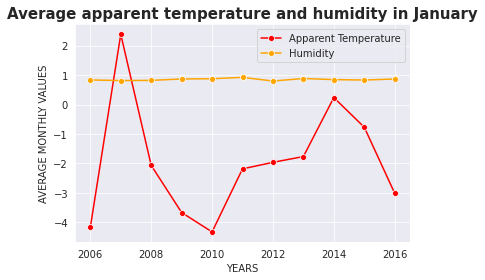

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["January"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["January"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in January", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In January, we observe that humidity remained constant whi;e apparent temperature heavily fluctuated, especiallyy in 2007 where it peaked at about 2.2 degree. After that it steeply dipped and made a low point of about -4.3 degree in 2010. The temperature in 2016 indicates a probability that temperature might decrease in the same month in 2017.



## For February

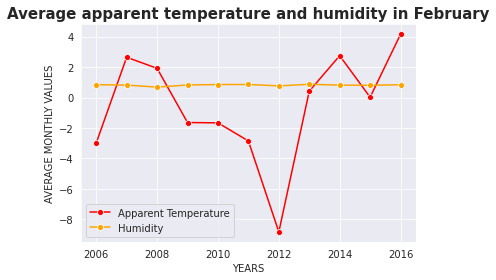

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["February"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["February"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in February", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In February, we see that the temperature dipped at 2012 at about -9 degrees and peaked at 2016 at about 4.1 degrees. Humidity remained constant throughout the month.

## For March

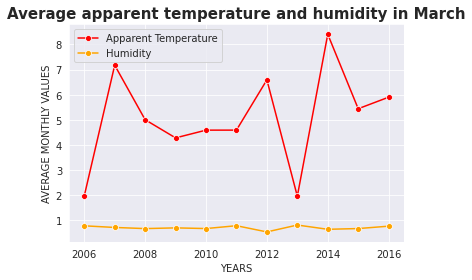

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["March"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["March"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in March", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In March, we see that humidity again maintained a steady line whereas temperatue fluctuated as usual. It peaked at 2014 at about 8.5 degree and dipped at 2015 at about 2 degree.

## For April

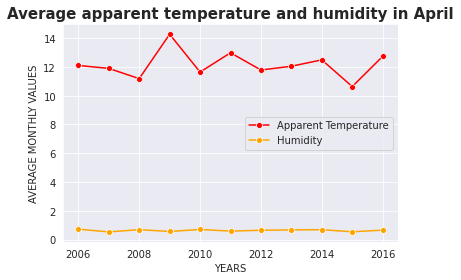

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["April"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["April"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in April", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In april, we see that for the first time, temperature maintained a less fluctuating line. However, in april temperature increased as compared to the previous months. It is due to the fact that april is a warmer month that the previous three. It peaked at 2009 at about 14 degress and dipped at 2011 at about 11 degrees.

## For May

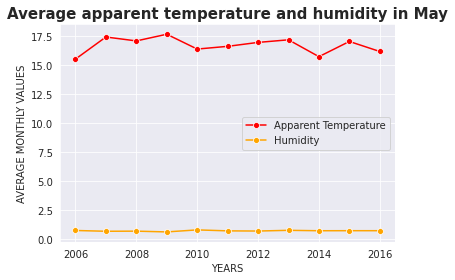

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["May"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["May"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in May", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In may, we see that temperature continues to increase as compared to the previous months and it maintains a more stale line as compared to the previous months as well.

## For June

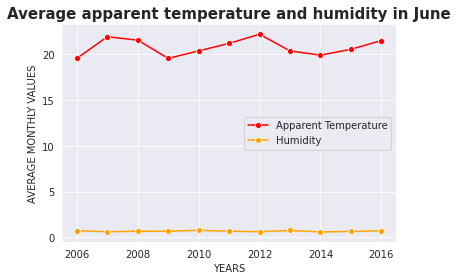

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["June"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["June"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in June", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In june, we see that the temperature varied at a stable rate.It peaked at 2012 and dipped at 2006.

## For July

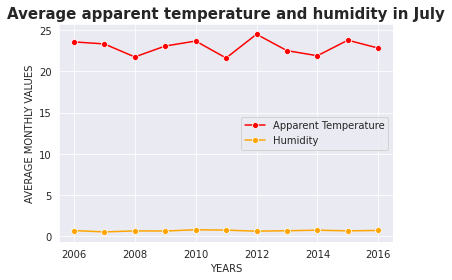

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["July"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["July"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in July", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In July, we see that the temperatue fluctuated, peaking at about

## For August

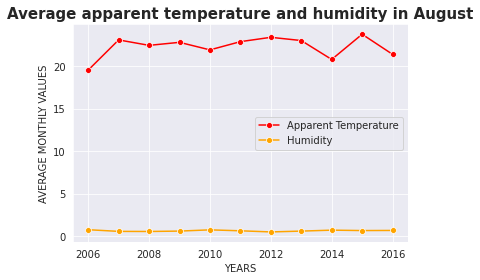

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["August"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["August"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in August", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In august, we see that the temperature fluctuated again, peaking at 2015 at around 23 degress and dipped in 2006 at around 19 degress

## For September

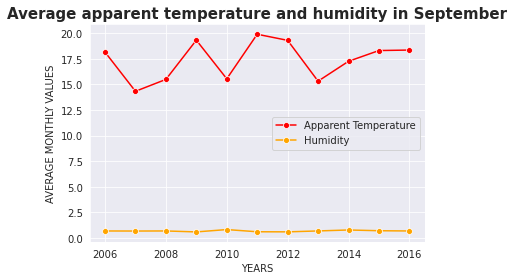

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["September"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["September"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in September", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In septeber, we see that the temperature again started to fluctuate higher than the preceding months. It dipped at 2009 at around 14 degrees and peaked at around 20 degrees in 2011. 

## For October

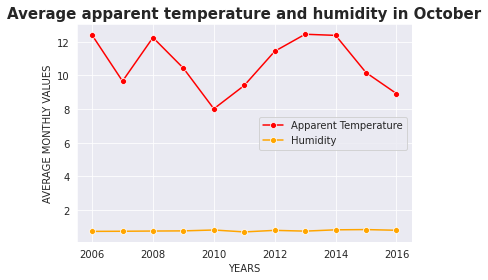

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["October"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["October"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in October", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In october, we see that temperature started fluctuatuin higher, peaking at around 2006 and dipped in 2010 at around 8 degrees.

## For November

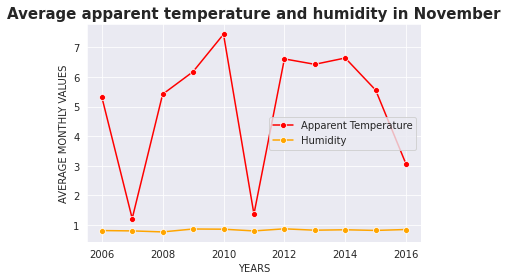

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["November"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["November"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in November", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In november, we see that temperature stared fluctuating alot, just like in the early months of January and February. It dipped two times in 2009 and 2011 where it was around 1.2 and 1.3 degrees respectively.

## For December

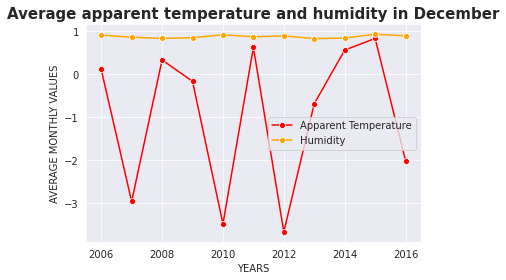

In [ ]:
%matplotlib inline

sns.lineplot(x=yrs,y=app_temp_monthwise["December"], color = "red", marker = "o")
sns.lineplot(x=yrs, y = humid_monthwise["December"], color = "orange", marker = "o")
plt.legend(["Apparent Temperature", "Humidity"])
plt.title("Average apparent temperature and humidity in December", fontweight="bold", fontsize = 15)
plt.xlabel("YEARS")
plt.ylabel("AVERAGE MONTHLY VALUES");

In december, temperature fluctuated alot as usual, dipped in 2012 where it was about -3.9 degrees and peaked in 2015 where it was about 0.8 degrees.

## BAR GRAPHS SHOWING AVERAGE ANNUAL APPARENT TEMPERATURE AND AVERAGE ANNUAL HUMIDITY FOR EACH YEARC FROM LEFT TO RIGHT, RESPECTIVELY.

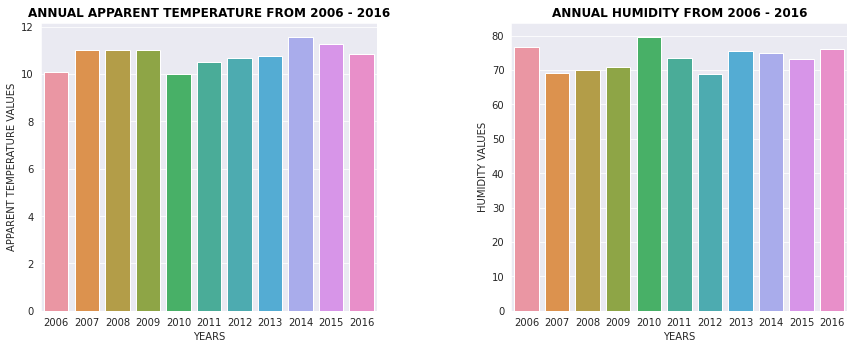

In [ ]:
figure, axis = plt.subplots(1, 2, figsize = (14,5))

sns.barplot(x=yrs, y=apparent_annual_temp, ax = axis[0])
axis[0].set_title("ANNUAL APPARENT TEMPERATURE FROM 2006 - 2016", color = "black", fontsize = 12, fontweight="bold")
plt.setp(axis[0], xlabel='YEARS')
plt.setp(axis[0], ylabel='APPARENT TEMPERATURE VALUES')

sns.barplot(x=yrs, y= annual_humidity_percent, ax = axis[1])
axis[1].set_title("ANNUAL HUMIDITY FROM 2006 - 2016", color = "black", fontsize = 12, fontweight="bold")
plt.setp(axis[1], xlabel='YEARS')
plt.setp(axis[1], ylabel='HUMIDITY VALUES')
#figure.tight_layout()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# CONCLUSIONS
The analysis and visualsiations give us the following conclusions:
*   Due to global warming and greenhouse effect, there is an uncertainity in the overall apparent temperature. It tends to heavily fluctuate.
*   The apparent temperature tends to heavily fluctuate from September to March, giving a sign that there is a higher uncertainity in apparent temperature during these months.
*   From April to September, temperature fluctuates at a less rate as compared to the other time period.
*   Humidity has remained mostly constant through out the years, despite the sharp variation in apparent temperature.
In short, global warming has caused a high variation in the apparent temperature readings.

